#### 参照文献：ゼロから作るDeep Learning ― Pythonで学ぶディープラーニングの理論と実装 (斎藤 康毅　著)

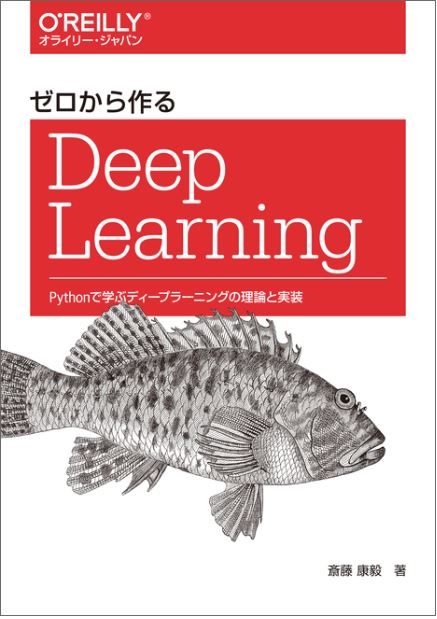

In [19]:
from IPython.display import Image
Image("./[参考テキスト] ゼロから作るDeep Learning.jpg")

# 〇勾配消失問題

勾配消失問題とは、誤差逆伝播法が下位層に進んでいくにつれて勾配がどんどん緩やかになっていくことによって、下位層のパラメータがほとんど変わらなくなり、全体の最適解に収束しなくなることである。勾配消失問題は、グラフ等で可視化することによって確認することができる。  
シグモイド関数の場合、微分の最大値は"0.25"となるため、下位層に進むにつれて、"0.25"の二乗..を繰り返して"0"の値に近づく。  

## １．勾配消失問題の解決方法

(1) 活性化関数を選択する  
(2) 重みの初期値を設定する  
(3) バッチ正規化をおこなう  

### 1.1．活性化関数の選択

### 1.1.1. シグモイド関数  
### $\sigma(x) = \frac{1}{1+\exp(-ax)}$
シグモイド関数$\sigma(x)$とは、入力が実数のとき、出力が必ず"0"~"1"の間に収まる単調増加関数である。  
シグモイド関数$\sigma(x)$は、"勾配消失問題"を引き起こす代表的な活性化関数である。  
> (理由)：シグモイド関数を"微分"していくと最大値が"0.25"となる。そのため、下位層に進むにつれて"0.25"の二乗を繰り返していくため、最終的には"0"に収束していく。  
> (対策)：勾配消失が発生しにくい活性化関数を選択すること＝"ReLU"関数(正規化線形関数)


In [20]:
# シグモイド関数の実装(p48)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

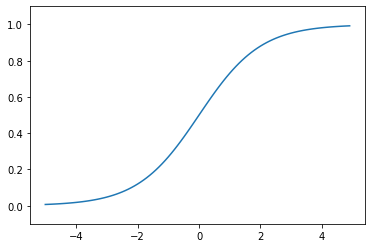

In [21]:
# ライブラリ(共通)
# ---------------------------------
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# ---------------------------------
x = np.arange(-5.0, 5.0 , 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 1.1.2. ReLU関数(正規化線形関数)  
### ${f(x) = \left \{\begin{array}{l}
x \qquad (x>0)\\
0 \qquad (x\leqq 0) \end{array} \right.}$  

ReLU関数とは、入力が閾値(0)を超えている場合、入力をそのまま出力する関数である。  
＜ReLU関数の利点＞  
・微分した結果に"1"があるため、"勾配消失問題"を回避することができる  
・微分値が"0"になるとき、重みの更新が終了し必要な重みだけしか残らなくなり、必要な部分だけが抽出される(スパース化)

In [22]:
# ReLU関数(正規化線形関数)の実装(p52)
def relu(x):
    return np.maximum(0, x)

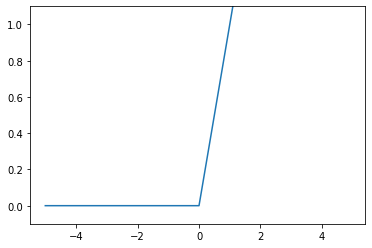

In [23]:
# ライブラリ(共通)
# ---------------------------------
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# ---------------------------------
x = np.arange(-5.0, 5.0 , 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 1.2．重みの初期値設定

重みを初期値を工夫して設定することによって、"勾配消失問題"を解決する  
重みの初期化には乱数を利用する(通常は正規分布に従った乱数を設定する)  

＜重みの初期値設定方法＞  
・Xavier(ザビエル)  
・He  
・バッチ正規化  

### 1.1.2. Xavier(ザビエル)

"Xavier"(ザビエル)：各重みに対して前の層のノード数($n$)に対して、ノード数($n$)の平方根で除算した値($\times \frac{1}{\sqrt{n}}$)を初期値とするアルゴリズム  
"Xavier"(ザビエル)を用いて初期値を設定する場合、合わせて用いられる活性化関数(※"S字カーブ"を描く活性化関数と相性が良い⇔ "He")  
> (1) シグモイド関数(ロジスティック)  
> (2) "ReLU"関数  
> (3) 双曲線正接関数(tanh)  

### 1.1.3. He

He：各重みに対して前の層のノード数($n$)に対して、$\times \sqrt{\frac{2}{n}}$した値を初期値とするアルゴリズム  
"He"を用いて初期値を設定する場合、合わせて用いられる活性化関数(※"S字カーブ"を描かない活性化関数と相性が良い⇔ "Xavier"(ザビエル))  
> "ReLU"関数  

### 1.1.4. バッチ正規化

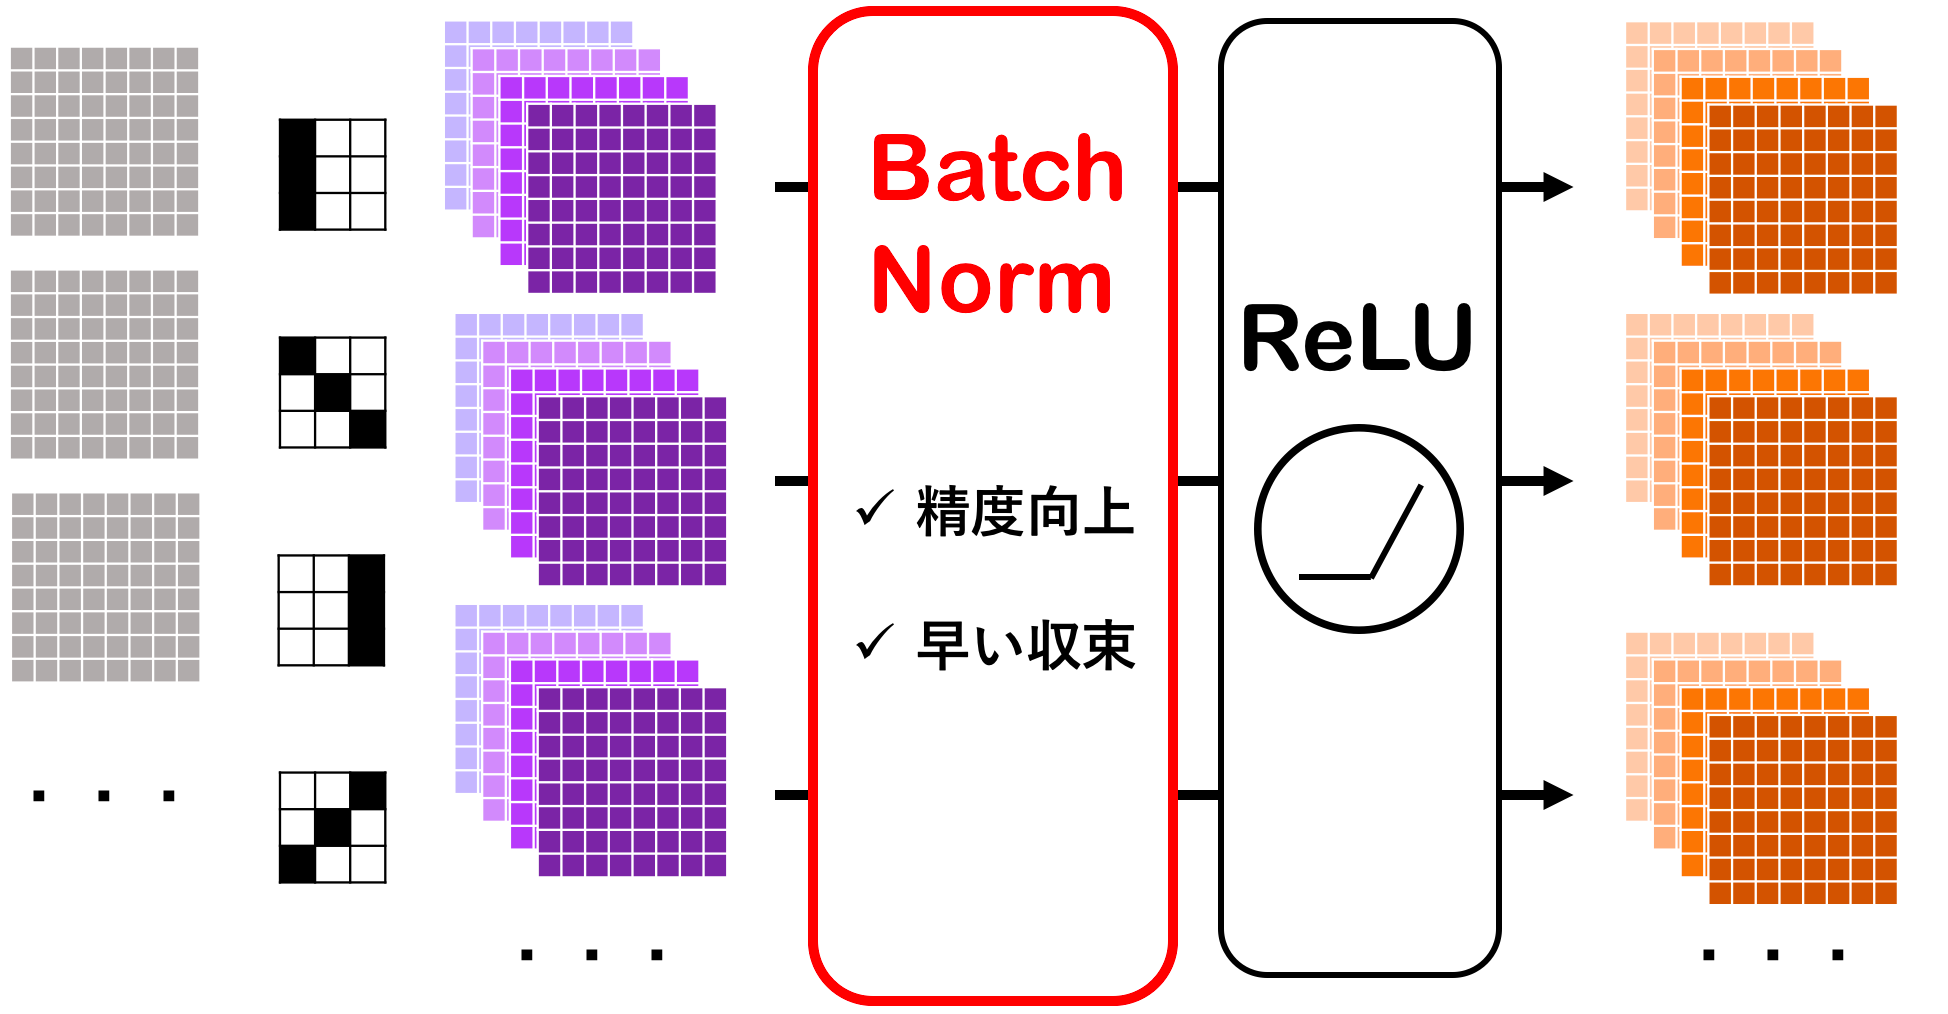

In [24]:
from IPython.display import Image
Image("./[深層学習2日目01]バッチ正規化.png")

ニューラルネットワークで学習を行うとき、多くの場合"ミニバッチ"という小さなデータの塊に分割して学習を進めている。  
バッチ正規化とは、"ミニバッチ"単位で入力値のデータの偏りを抑制する方法である。  
バッチ正規化では、活性化関数に値を渡す前後にバッチ正規化の処理を含む層を加える(入力値に重みをかけてバイアスを加えた部分or活性化関数の出力値)  

＜バッチ正規化の利点＞  
・"ミニバッチ"を用いてデータの分布を正規化すると、学習データのバラつきを抑えることができる  
・中間層における重みの安定度が増すため、過学習を抑えることができる  

#### (1) ミニバッチ$t$全体の平均  
> ## $\mu_{t} = \frac{1}{N}\sum_{i=1}^{N_{t}}{x_{ni}}$  

#### (2) ミニバッチ$t$全体の分散  
> ## $\mu_{t} = \frac{1}{N_{t}}\sum_{i=1}^{N_{t}} (x_{ni} - \mu_{t})^2$

#### (3) ミニバッチ$t$全体の標準偏差  
> ## $\mu_{t} = \sqrt{\frac{1}{N}\sum_{i=1}^{N_{t}}{(x_{ni} - \mu_{t})}^2}$  

#### (4) ミニバッチ$t$全体の正規化  
> ## $\hat{x}_{ni} = \frac{x_{ni} - \mu_{t}}{\sqrt{\sigma_{t}^{2} + \theta}}$  

#### (5) ミニバッチのインデックス値($x_{ni}$)とスケーリング値を掛けて、シフトパラメータ($\gamma$)を足した値($y_{ni}$)  
> ## $y_{ni}=\gamma x_{ni} + \beta$  
>> $\gamma$：スケーリング値  
>> $\beta$シフトパラメータ  

#### (6) 逆伝播において、正規化するための最適な値を学習する("$\gamma$"と"$\beta$")

# 〇確認テスト

## １.１．確認テスト

### $\big\{\begin{array}{l}
z = t^2 \\
t = x + y \end{array}$  

Q. 連鎖律の原理を使い、dz/dxを求めよ。    

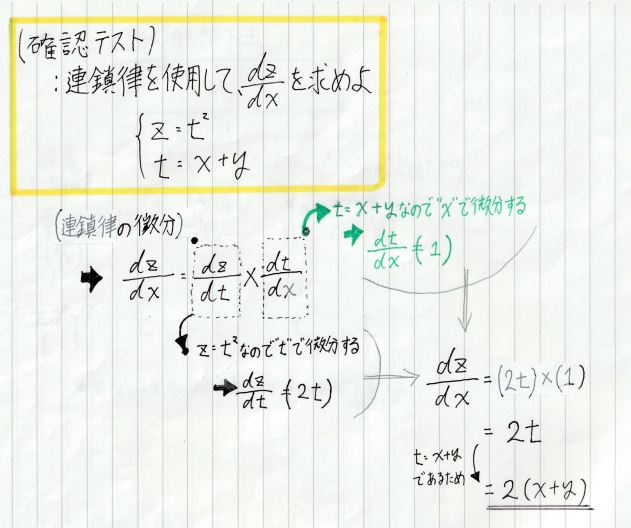

In [25]:
from IPython.display import Image
Image("./[確認テスト2] 0101(連鎖律の原理).jpg")

## １.２．確認テスト

Q. シグモイド関数を微分した時、入力値が"0"の時に最大値をとる。その値として正しいものを選択肢から選べ
> （1）0.15（2）0.25（3）0.35（4）0.45  

A. （2）0.25

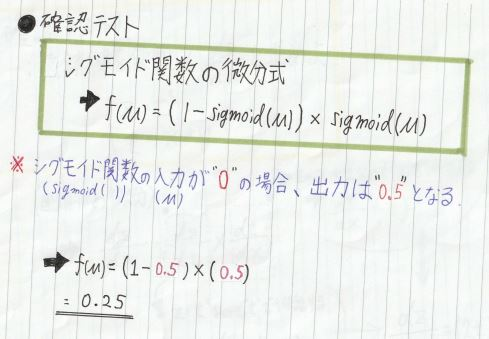

In [26]:
from IPython.display import Image
Image("./[確認テスト2] 0102(シグモイド関数の微分).jpg")

## １.３．確認テスト

Q. 重みの初期値に"0"を設定すると、どのような問題が発生するか。簡潔に説明せよ。  
A. 全ての重み($W$)の値が"同じ値"で更新されるため、値の最適化(チューニング)がなされなくなり、ニューラルネットワークの学習が正常に行われない 　 


## １.４．確認テスト

Q. 一般的に考えられる"バッチ正規化"の効果を2点挙げよ。  
A)  
(1)：中間層の重み($W$)の学習が安定するため、"勾配消失問題"の発生を抑制することができる  
(2)：計算が効率化することができるため、"過学習"の発生を抑制することができる  

# 〇Jupyter(実装)

### 1.1．勾配消失問題

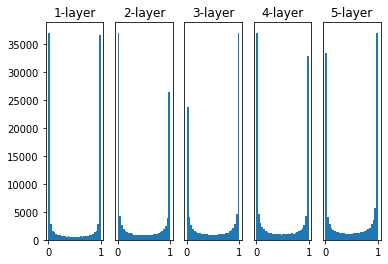

In [27]:
# ライブラリ
import numpy as np
import matplotlib.pyplot as plt
# ----------------------------------------
# ---活性化関数を定義する---
# ----------------------------------------
# (1)シグモイド関数

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# ------------------------------
# (2)ReLU関数(正規化線形関数)

def ReLU(x):
    return np.maximum(0, x)
# ------------------------------
# (3)tanh関数(双曲線正接関数)

def tanh(x):
    return np.tanh(x)
# ------------------------------
# ----------------------------------------
# サンプルデータ(例)1000個のデータを用意する)    
input_data = np.random.randn(1000, 100)

# 各隠れ層の数(ノード(ニューロン))
node_num = 100

# 隠れ層の数(例)5層)
hidden_layer_size = 5 
# -----------------------------------------------------------------------
# アクティベーションの結果を格納する
activations = {}


x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 重み(W)の初期値の値を変えて実験する！
    
    #標準偏差の値が"1"のガウス分布
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z
# -----------------------------------------------------------------------
# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()
# -----------------------------------------------------------------------

・重み($W$)の初期値(スケール)：標準偏差(スケール)の値が"1"のガウス分布  
・活性化関数：シグモイド関数  
➡"0"と"1"に偏ったデータ分布の場合、逆伝播の勾配の値が徐々に小さくなって消えていく("勾配消失"が発生している)

### 1.2．Xavier

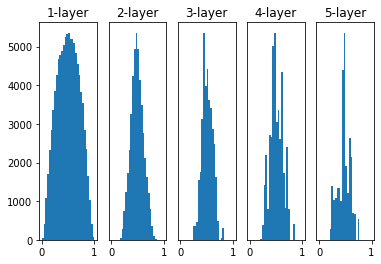

In [28]:
# ライブラリ
import numpy as np
import matplotlib.pyplot as plt
# ----------------------------------------
# ---活性化関数を定義する---
# ----------------------------------------
# (1)シグモイド関数

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# ------------------------------
# (2)ReLU関数(正規化線形関数)

def ReLU(x):
    return np.maximum(0, x)
# ------------------------------
# (3)tanh関数(双曲線正接関数)

def tanh(x):
    return np.tanh(x)
# ------------------------------
# ----------------------------------------
# サンプルデータ(例)1000個のデータを用意する)    
input_data = np.random.randn(1000, 100)

# 各隠れ層の数(ノード(ニューロン))
node_num = 100

# 隠れ層の数(例)5層)
hidden_layer_size = 5 
# -----------------------------------------------------------------------
# アクティベーションの結果を格納する
activations = {}


x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 重み(W)の初期値の値を変えて実験する！
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num) #「"Xavier"の初期値」を使用する
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z
# -----------------------------------------------------------------------
# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()
# -----------------------------------------------------------------------

・重み($W$)の初期値(スケール)："Xavier"の初期値を使用する   
・活性化関数：シグモイド関数  
➡"上手く学習が進んでいく("勾配消失"が発生しない)

### 1.3．He

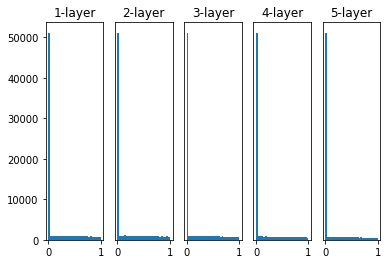

In [29]:
# ライブラリ
import numpy as np
import matplotlib.pyplot as plt
# ----------------------------------------
# ---活性化関数を定義する---
# ----------------------------------------
# (1)シグモイド関数

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# ------------------------------
# (2)ReLU関数(正規化線形関数)

def ReLU(x):
    return np.maximum(0, x)
# ------------------------------
# (3)tanh関数(双曲線正接関数)

def tanh(x):
    return np.tanh(x)
# ------------------------------
# ----------------------------------------
# サンプルデータ(例)1000個のデータを用意する)    
input_data = np.random.randn(1000, 100)

# 各隠れ層の数(ノード(ニューロン))
node_num = 100

# 隠れ層の数(例)5層)
hidden_layer_size = 5 
# -----------------------------------------------------------------------
# アクティベーションの結果を格納する
activations = {}


x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 重み(W)の初期値の値を変えて実験する！
    w = np.random.randn(node_num, node_num) * np.sqrt(2 / node_num) #「"He"の初期値」を使用する
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 活性化関数の種類も変えて実験しよう！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z
# -----------------------------------------------------------------------
# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()
# -----------------------------------------------------------------------

・重み($W$)の初期値(スケール)："He"の初期値を使用する   
・活性化関数：ReLU関数  
➡"学習が迅速に進んでいく("勾配消失"が発生しない)

# 〇学習率最適化手法

## １．学習率の求め方

・初期は大きく設定し、学習が進むにつれて徐々に学習率を小さくする  
・パラメータごとに学習率を可変させる  
・"学習率最適化手法"を利用することによって、学習率を最適化する  

＜学習率最適化手法の種類＞  
> (1) モメンタム  
> (2) AdaGrad  
> (3) RMSprop  
> (4) Adam  

## 1.1．モメンタム

モメンタムでは勾配の"移動平均"を算出することによって、振動を抑える(過去の勾配を考慮することによって、急激な変化を抑制する)  

＜モメンタムのメリット＞  
・局所最適解に陥らない(谷間から最も低い位置(最適化)に辿り着くのが早い(大域的最適解))  

＜モメンタムを求める手順＞  
(1) 誤差をパラメータで微分した値($E$)と学習率($\varepsilon$)の積を引き算する("勾配降下法"と同じプロセス)  
> #### 勾配降下法  
>> ### ${w}^{(t+1)} = {w}^{(t)} - \varepsilon \nabla E$

(2) 現在の重みに"前回の学習の重み引いた値"と"慣性"の積を加える  
> ## $V_{t} = \mu V_{t-1} - \epsilon\nabla E$  
>> $μ$：慣性(ハイパーパラメータ)  
>> $V_{t-1}$：前回の学習の重み  
>> $- \epsilon\nabla E$：現在の重み  

> ## $w^{(t+1)} = w^{(t)} + V_{t}$  


## 1.2．AdaGrad

"AdaGrad"とは、次元ごとに学習率を変化させるようにしたものである。  

＜"AdaGrad"を利用するメリット＞  
・勾配の緩やかな斜面に対して、最小値に近づける  
・誤差関数が極端に深くならない  

＜"AdaGrad"を利用するデメリット＞  
・大域的最適解に辿り着きにくい(サドルポイント)  
> サドルポイント：ある方向で見れば極大値であるが、別の方向で見れば極小値となる点

(1)再定義した学習率($\epsilon \frac{1}{\sqrt{h_{t}} + \theta}$)、(2)誤差をパラメータで微分したもの($\nabla E$)、それらを掛け算して引いていくと"学習率"が徐々に小さくなっていく  
> ## $\epsilon \frac{1}{\sqrt{h_{t}} + \theta} \nabla E$  
>> $\epsilon \frac{1}{\sqrt{h_{t}} + \theta}$：再定義した学習率  
>> $\nabla E$：誤差をパラメータで微分したもの  

### ＜"AdaGrad"を求める手順＞  

#### (1) $h_{0} = \theta$  
> $\theta$：任意の値(※"0"にはならない微小な値)  
> $h_{0}$：$h$を初期化した値  
#### (2) $h_{t} = h_{t-1} + (\nabla E)^2$  
> $h_{t}$：$h$が学習率を決める重要な要素
## $w^{(t+1)} = w^{(t)} - \epsilon \frac{1}{\sqrt{h_{t}} + \theta} \nabla E$  


## 1.3. RMSprop

"AdaGard"を改良したもの  
➡ 1度でも学習率が"0"に近づくとほどんど変化しなくなる"AdaGrad"の問題点を改善したもの  
"AdaGard"と比較すると、局所最適解にならずに"大域的最適解"となる  

＜"RMSprop"を利用するメリット＞  
・ハイパーパラメータの調整が少なくて済む  

## $h_{t} = \alpha h_{t-1} + (1 - \alpha)(\nabla E)^2$  
## $w^{t+1} = w^{t} - \epsilon \frac{1}{\sqrt{h_{t}} + \theta} \nabla E$  
> $\alpha$(-<$\alpha$<1)：勾配を何倍して取り込むか  
> $h_{t-1}$：前回までの勾配情報  


## 1.4. Adam

"Adam"とは、これまでの学習率最適化手法の中で一番使用されている手法である。  

＜"Adam"は下記の要素を組み合わせた最適解アルゴリズム＞  
・モメンタム：過去の勾配の指数的減衰平均(移動平均による振動抑制)  
・RMSprop：過去の勾配の二乗の指数的減衰平均(学習率の調整を上手くする)  


# 〇確認テスト

## １.１．確認テスト

Q. モメンタム、AdaGrad、RMSpropの特徴をそれぞれ簡潔に説明せよ。  
A.)  
・モメンタム  
> "移動平均"を算出することによって、振動を抑える(過去の勾配を考慮することによって、急激な変化を抑制する)  

・AdaGrad  
> 次元ごとに学習率を変化させる(誤差関数が極端に深くならない)  

・RMSprop  
> 1度でも学習率が"0"に近づくとほどんど変化しなくなる("AdaGard"を改良したもの)  

# 〇Jupyter(実装)

### 1.1．SGD(確率的勾配降下法)

In [30]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 

### 1.2．モメンタム(Momentum)

In [31]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

### 1.3．AdaGrad

In [32]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### 1.4．RMSprop

In [33]:
class RMSprop:
    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### 1.5．Adam

In [34]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

# 〇過学習

過学習とは、テストごとの"訓練誤差"と"学習誤差"が乖離することである  

## １．過学習の原因

データでやりたいタスクに対して、ニューラルネットワークが複雑すぎる(=自由度が高い)ということ  
> パラメータの数が多い  
> パラメータの値が適切でない  
> ノードの数が多い 

学習が進むと"重みの値"にバラツキが発生する。  
"重みの値"が大きいということは、それが重要な値であることを表している。しかし、大きいことによって過学習の原因ともなる。    

## ２．正則化

正則化とは、誤差関数に正則化した値を加えることによって、"重みの値"を抑制することである。 

> ### ${\begin{eqnarray}
L_{p} = \|x \|_{p} =(|x_{1}|^{p} + ...+ |x_{n}|^{p})^{\frac{1}{p}} = \left(\sum_{i=1}^{n}|x_i|^{p} \right)^{\frac{1}{p}} \end{eqnarray}}$

### 2.1. L1正則化 / L2正則化  
L２正則化は、L１正則化より計算量があるためリソースを食うが性能は良い  
・L１正則化(p="1"の場合)  
・L２正則化(p="2"の場合)  

> ## $E_{n}(w) + \frac{1}{p} \lambda ||x||_{p}$  
>> $E_{n}(w)$：誤差関数  
>> $λ$：減衰させるスケーリングのための値  
>> $\frac{1}{p}||x||_{p}$：正則化した値


### 2.1. L1正則化 / L2正則化

## 2．ドロップアウト

ドロップアウトとは、ランダムに"ノード"を削除して学習させることである。  
過学習の課題として、"ノード"の数が多いことがある。そこでドロップアウトを使用することによって、疑似的なアンサンブル学習ができる。  

＜ドロップアウトのメリット＞  
・データ量を変化させることなく、異なるモデルを学習させているのだと解釈することができること  


# 〇確認テスト

## １.１．確認テスト

Q. 機械学習で使われる線形モデル(線形回帰、主成分分析、...etc)の正則化は、モデルの重みを制限することで可能になる。前述の線形モデルの正則化手法の中に"リッジ回帰"という手法があり、その特徴として正しいものを選択しなさい。  
> (a) ハイパーパラメータに大きな値に設定すると、全ての重みが限りなく０に近づく  
> (b) ハイパーパラメータを０に設定すると、非線形回帰となる。  
> (c) バイアス項についても、正則化される。  
> (d) リッジ回帰の場合、隠れ層に対して正則化項を加える  

A. (a)：Ridge推定量(="リッジ回帰")

## １.２．確認テスト

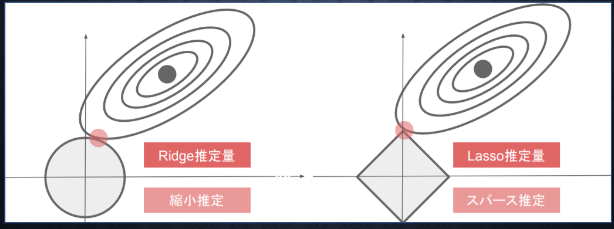

In [35]:
from IPython.display import Image
Image("./[深層学習2日目03]過学習(確認テスト02).png")

Q. L1正則化を表しているグラフはどちらか答えよ。  
A.) 右の図(Lasso推定量)  
> ハイパーパラメータに大きな値に設定すると、全ての重みが"０"になる(=L1正則化)

# 〇畳み込みニューラルネットワーク(CNN：Convolutional Neural Network)

畳み込みニューラルネットワーク("CNN")とは、主に画像認識等で使用されているニューラルネットワークである。  
ただし画像認識だけでなく、１次元CNNを使用することによって、"時系列データ"を扱うことも可能である。  
> (例)：画像の場合、縦・横・チャンネル(RGB)について学習することができる  


## 1．畳み込み層

畳み込み層では、画像とフィルタ(カーネル)の積の総和にバイアスを加えて算出することによって特徴を抽出することができる。  
> (例)：横線を抽出するフィルタに対する畳み込みの結果が大きければ横線の"特徴"を抽出し、小さければ横線がないとする。  
>> 畳み込み層のフィルタサイズ：(3×3)(5×5)...etc

＜畳み込み層のメリット＞  
・活性化関数に負数を"0"にできる"ReLU"関数を使用することによって、そのフィルタに対する"特徴を持っていない"箇所を無視して扱うことができるため、学習に悪影響を与える要素を防ぐことができる。  


### 1.1. パディング

パディングとは、画像の周囲に"固定値"を埋め込むことである。(※固定値は"0"を使用することが多い)  
パディングに使用する"固有値"は、"0"でなくても問題はない。しかし学習に影響を与える可能性があるため、固有値を"0"と捉えることが多い。

(1)パディングをしないで"畳み込み"をした場合  
> (1.1) 元の画像より小さくなる  
> (1.2) 画像の端の方は、他の部分と比較して畳み込みに使用される回数が少なくなるため、"特徴"として抽出されにくい  

(2)パディングをして"畳み込み"をした場合  
> (2.1) サイズを維持することができる  
> (2.2) 画像の端の方も、"特徴"を抽出することができる  


### 1.2. ストライド

ストライドとは、フィルタをどれだけずらして"畳み込み"を行うかということである。  
画像に対してフィルタを少しずつずらしながら"畳み込み"を行っている。  
> (例)：ストライドを"１"とした場合
>> 次に行う"畳み込み"は１ピクセルずらして行うことになる  

> (例)：ストライドを"２"とした場合  
>> 次に行う"畳み込み"は２ピクセルずらして行うことになる  


### 1.3. チャンネル

チャンネルとは、空間的な奥行きのことである。  
> (例)：画像のチャンネルを"１"とした場合  
>> 画像(RBG)の違いを区別せずに"畳み込み"をすることになるため、正確な結果を得ることができない  

> (例)：画像のチャンネルを"３"とした場合  
>> 画像(RBG)の違いを区別して"畳み込み"をするため、正確な結果を得られる  


## 2．プーリング層

プーリング層とは、対象領域の中から"１つの値"を取得する層である。  
プーリング層では、"畳み込み"をした後に行うことによって、それらしい特徴を持った値"のみ"を抽出することが可能となる。  


### 2.1. 最大値プーリング

対象領域の中で"最大値"を取得する  
> (例)：対象領域(3×3/5×5 ..etc)  

### 2.2. 平均値プーリング

対象領域(例：３×３)の中で"最小値"を取得する  
> (例)：対象領域(3×3/5×5 ..etc)  

# 〇確認テスト

## １.１．確認テスト

Q. サイズ6×6の入力画像を、サイズ2×2のフィルタで畳み込んだ時の出力画像のサイズを答えよ。なおストライドとパディングは1とする。  
A. 

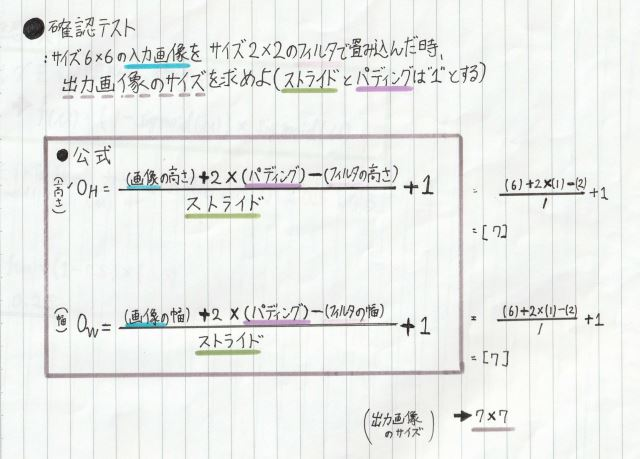

In [36]:
from IPython.display import Image
Image("./[確認テスト2] 0104(折り畳み画像の出力).jpg")

# 〇AlexNet

2012年にImageNetコンペティションにて優勝したモデル  
5層の畳み込み層及びプーリング層、それに続いて2層の全結合層という構造(ドロップアウトを使用して過学習を抑えている)  
